In [16]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

In [17]:
data = {
    'No preprocessing': [0.784693, 0.791845, 0.795470],
    'Rm ft2': [0.786814, 0.791845, 0.795470],
    'Rm ft2 + isoF outlier removal': [0.763181, 0.792710, 0.782105],
    'Rm ft2 + isoF outlier removal \n+ stdscale': [0.770054, 0.792710, 0.781328],
    'Rm ft2 + isoF outlier removal \n+ stdscale + drop ft based on perm imp.': [0.761900, 0.788001, 0.760194],
    'Rm ft2 + isoF outlier min max cap \n+ stdscale': [0.777968, 0.788468, 0.789704],
    'Rm ft2 + isoF outlier min max cap \n+ stdscale + drop ft based on perm imp.': [0.784580, 0.802356, 0.777812],
}

df = pd.DataFrame.from_dict(data)

df = df.melt(var_name='preprocessing', value_name='f1score')

df['algorithm'] = ['ExtraTreesClassifier', 'HistGradientBoostingClassifier', 'XGBClassifier'] * (len(df) // 3)

df

,preprocessing,f1score,algorithm
0,No preprocessing,0.784693,ExtraTreesClassifier
1,No preprocessing,0.791845,HistGradientBoostingClassifier
2,No preprocessing,0.795470,XGBClassifier
3,Rm ft2,0.786814,ExtraTreesClassifier
4,Rm ft2,0.791845,HistGradientBoostingClassifier
5,Rm ft2,0.795470,XGBClassifier
6,Rm ft2 + isoF outlier removal,0.763181,ExtraTreesClassifier
7,Rm ft2 + isoF outlier removal,0.792710,HistGradientBoostingClassifier
8,Rm ft2 + isoF outlier removal,0.782105,XGBClassifier
9,Rm ft2 + isoF outlier removal \n+ stdscale,0.770054,ExtraTreesClassifier


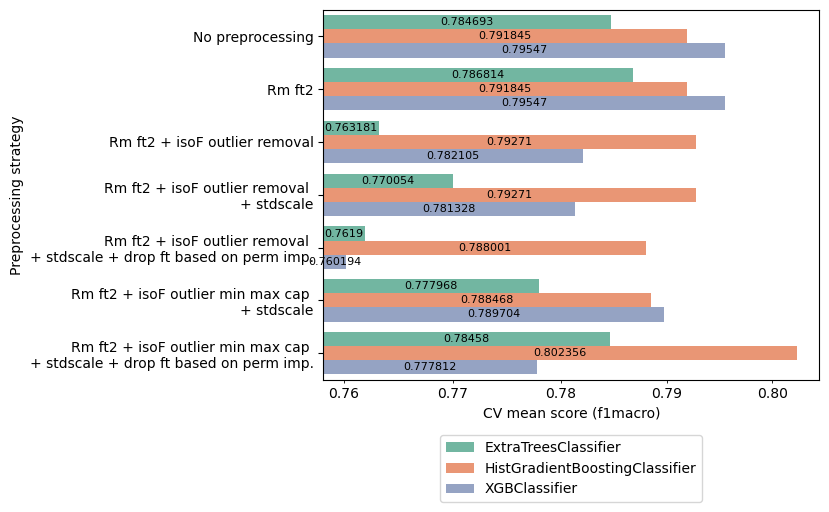

In [20]:
g = sns.barplot(df, x='f1score', y='preprocessing', hue='algorithm', palette=sns.color_palette('Set2'))
for i in g.containers:
    g.bar_label(i, label_type='center', fontsize=8)
plt.ylabel('Preprocessing strategy')
plt.xlabel('CV mean score (f1macro)')
plt.xscale('log')
ax = plt.gca()
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.legend(loc=8, bbox_to_anchor=(0.5, -0.35))
plt.show()